# 1. Wczytanie danych i bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../data/to_model/new_york_listings_2024_to_model.csv");
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,718037328155265207,Rental unit in Queens · 5 bedrooms · 8 beds · ...,204539,Mark,Queens,Ridgewood,40.70262,-73.89800,Entire home/apt,471.0,...,2022-11-03,0.07,9,365,0,No License,No rating,5,8,2
1,5536638,Rental unit in Brooklyn · ★4.60 · 2 bedrooms ·...,28709982,Sidiq,Brooklyn,Williamsburg,40.72027,-73.95513,Entire home/apt,225.0,...,2023-09-13,0.49,5,90,7,No License,4.60,2,2,1
2,4605840,Rental unit in Brooklyn · ★4.93 · 1 bedroom · ...,23788242,Suzanne,Brooklyn,Bedford-Stuyvesant,40.68670,-73.94856,Private room,80.0,...,2023-11-17,1.00,2,363,12,No License,4.93,1,1,1
3,594240338554500815,Rental unit in New York · 1 bedroom · 1 bed · ...,384559808,Best Inns USA,Manhattan,East Village,40.73221,-73.98689,Entire home/apt,83.0,...,2023-08-11,0.12,30,106,1,No License,No rating,1,1,1
4,26785,Rental unit in Brooklyn · ★4.93 · 1 bedroom · ...,42273,Dani,Brooklyn,South Slope,40.66860,-73.98723,Entire home/apt,90.0,...,2022-05-31,2.90,3,188,0,No License,4.93,1,1,1


# 2. Wnioski po EDA
- 1606 wierszy i 22 kolumny
- brak wartości Null
- bylo pare kolumn o dziwnych typach - object (baths, bedrooms, rating, license)

Zmiany, które przeprowadziliśmy:
- usunelismy kolumny 'id', 'name', 'host_id', 'host_name' (są to wartości w większości unikalne)
- mapujemy kolumnę 
        - 'license' na 0 i 1 (0 - brak licencji, 1 - licencja)
        - 'baths' na int (jeśli nie jest podana to 0)
        - 'bedrooms' na int (jeśli nie jest podana to 0, a jeśli jest studio to 1)
        - 'rating' na float (jeśli nie ma to NaN)
        
Ostatecznie uzyskalismy 11 zmiennych ilosciowych i 4 kategoryczne

### Przygotowanie danych zgodnie z wnioskami z EDA

In [3]:
def lic_mapper(a):
    if a == "No License" or a == "Exempt":
        return 0
    else:
        return 1

def bath_mapper(a):
    if a == "Not specified":
        return 0
    else:
        return int(float(a))
def bedroom_mapper(a): # Uznałem, że posiadanie studio (czyli całe mieszkanie w jednym większym pokoju) to tak jakby była jedna sypialnia
    if a == "Studio":
        return 1
    else:
        return int(a)
def rating_mapper(a): # na razie tak może zostać
    if a == "New " or a == "No rating":
        return np.nan
    else:
        return float(a)
data["license"] = data["license"].map(lic_mapper)  # Jeśli ma licencję to 1, jeśli nie to 0
data["baths"] = data["baths"].map(bath_mapper)
data["bedrooms"] = data["bedrooms"].map(bedroom_mapper)
data["rating"] = data["rating"].map(rating_mapper)
data["last_review"] =  data["last_review"].map(np.datetime64) # Zmapowałem też date ostatniej opinii do przeznaczonego do tego typu
data = data.drop(["id", "name", "host_id", "host_name"], axis = 1) 
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,Queens,Ridgewood,40.702620,-73.898000,Entire home/apt,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,Brooklyn,Williamsburg,40.720270,-73.955130,Entire home/apt,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,Brooklyn,Bedford-Stuyvesant,40.686700,-73.948560,Private room,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,Manhattan,East Village,40.732210,-73.986890,Entire home/apt,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
4,Brooklyn,South Slope,40.668600,-73.987230,Entire home/apt,90.0,30,479,2022-05-31,2.90,3,188,0,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,Brooklyn,Bedford-Stuyvesant,40.686001,-73.943693,Entire home/apt,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,Queens,Corona,40.745100,-73.864880,Private room,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,Bronx,Allerton,40.867770,-73.860180,Entire home/apt,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,Manhattan,Harlem,40.830791,-73.949509,Private room,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


Trzeba sie zastanowic czy zostawic nieighborhood_group, neighborhood czy latitude i longitude

In [4]:
data["neighbourhood"].unique()

array(['Ridgewood', 'Williamsburg', 'Bedford-Stuyvesant', 'East Village',
       'South Slope', 'Dyker Heights', 'West Village', 'Bushwick',
       'Crown Heights', 'Astoria', 'Gramercy', 'East Harlem',
       'Prospect Heights', 'Flatbush', 'Kingsbridge', 'Cypress Hills',
       'East Flatbush', 'Jamaica', 'Springfield Gardens', 'Brownsville',
       "Hell's Kitchen", 'Laurelton', 'Middle Village', 'Upper West Side',
       'Forest Hills', 'Harlem', 'East New York', 'Nolita',
       'Downtown Brooklyn', 'Bensonhurst', 'Fort Greene', 'Flushing',
       'Prospect-Lefferts Gardens', 'Hunts Point', 'Greenwich Village',
       'Melrose', 'Stapleton', 'Coney Island', 'Washington Heights',
       'Upper East Side', 'Clinton Hill', 'Financial District',
       'Elmhurst', 'Norwood', 'Stuyvesant Town', 'Mott Haven', 'Inwood',
       'Tribeca', 'Clifton', 'St. Albans', 'Mount Eden',
       'Ditmars Steinway', 'Mount Hope', 'Lower East Side', 'Chinatown',
       'Greenpoint', 'Little Italy', 'Br

w neighborhood jest az 218 unikalnych wartosci, wiec raczej nie warto zostawic - predzej moze neighborhood_group bo tam jest ich mniej
Jendak nadal wtedy bedzie probelm z encodingiem.
Dlatego moze warto zostawic latitude i longitude, bo to sa juz jakies liczby, a przenosza te same informacje co neighborhood_group

In [5]:
df = data.copy()
df = df.drop(["neighbourhood", "neighbourhood_group"], axis = 1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,Entire home/apt,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,40.720270,-73.955130,Entire home/apt,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,40.686700,-73.948560,Private room,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,40.732210,-73.986890,Entire home/apt,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
4,40.668600,-73.987230,Entire home/apt,90.0,30,479,2022-05-31,2.90,3,188,0,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,40.686001,-73.943693,Entire home/apt,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,40.745100,-73.864880,Private room,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,40.867770,-73.860180,Entire home/apt,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,40.830791,-73.949509,Private room,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


Ostatecznie mamy 16 kolumn, w tym 14 zmiennych ilościowych i 1 kategoryczną (+ 1 zmienna z datą)

In [6]:
numerical = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm", "license", "beds", "rating", "bedrooms", "baths", "latitude", "longitude"]
categorical = ["room_type"]
date = ["last_review"]

# 3. inzynieria cech

## 3.1. Zmienne kategoryczne

In [7]:
# sprawdzanie unikalnych wartosci w zmiennych kategorycznych
for col in categorical:
    print(col, df[col].unique())

room_type ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


room type ma tylko 4 wartosci unikalne, dlatego zastanawiam sie miedzy ordinal encoding a label encoding
zdecydowalam sie na ordinal encoding

In [8]:
# ordinal encoding
room_type_map = {
    'Entire home/apt' : 3,
    "Hotel room": 2,
    "Private room": 1,
    "Shared room": 0 
}
df["room_type"] = df["room_type"].map(room_type_map)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,3,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,40.720270,-73.955130,3,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,40.686700,-73.948560,1,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,40.732210,-73.986890,3,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
4,40.668600,-73.987230,3,90.0,30,479,2022-05-31,2.90,3,188,0,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,40.686001,-73.943693,3,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,40.745100,-73.864880,1,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,40.867770,-73.860180,3,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,40.830791,-73.949509,1,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


In [9]:
# Dodajmy te zmienną jako, że juz przeszła transformację
numerical.append("room_type")

## 3.2. Zmienne daty

zastanawiam sie nad ususnieciem tej kolumny, bo nie wiem czy bedzie ona wazna
a jesli ja zostawiamy to nie wiem jak ja zakodowac

In [10]:
# (BARTEK) mozemy zakodowac TAK:
# najpierw zamieniamy na sekundy unixowe
new_review = df["last_review"].apply(lambda x: x.timestamp())
new_review

0        1.667434e+09
1        1.694563e+09
2        1.700179e+09
3        1.691712e+09
4        1.653955e+09
             ...     
16601    1.673309e+09
16602    1.697414e+09
16603    1.696637e+09
16604    1.702166e+09
16605    1.685578e+09
Name: last_review, Length: 16606, dtype: float64

In [11]:
# potem tak naprawde robimy minmaxscaling
a = new_review.min()
b = new_review.max()
new_review = new_review.apply(lambda x: (x - a) / (b - a))
new_review

0        0.898937
1        0.973081
2        0.988430
3        0.965289
4        0.862102
           ...   
16601    0.914994
16602    0.980874
16603    0.978749
16604    0.993861
16605    0.948524
Name: last_review, Length: 16606, dtype: float64

In [12]:
# W ten sposób otrzymaliśmy metrykę na przedzial [0, 1] jak dawno było ostatnie review, co moze byc jakkolwiek uzyteczne
# Dowod, że na [0, 1]
print(new_review.min())
print(new_review.max())

0.0
1.0


In [13]:
# Pozostaje przypisać do ramki wyjściowej i kolumn numerycznych
df["last_review"] = new_review
numerical.append("last_review")

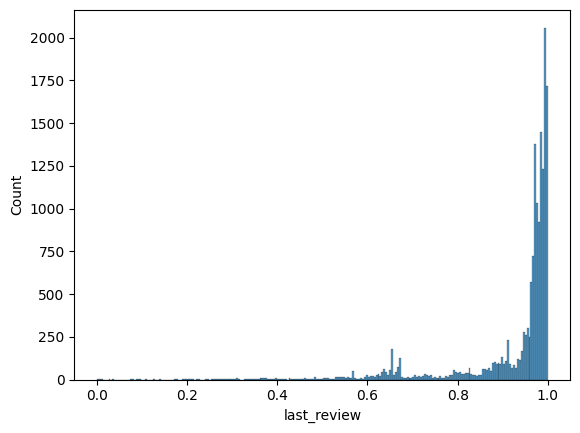

In [14]:
# Przy okazji raczej dosyc oczywisty histogram nowej zmiennej
sns.histplot(x = new_review)
plt.show()

## 3.3. Outliery

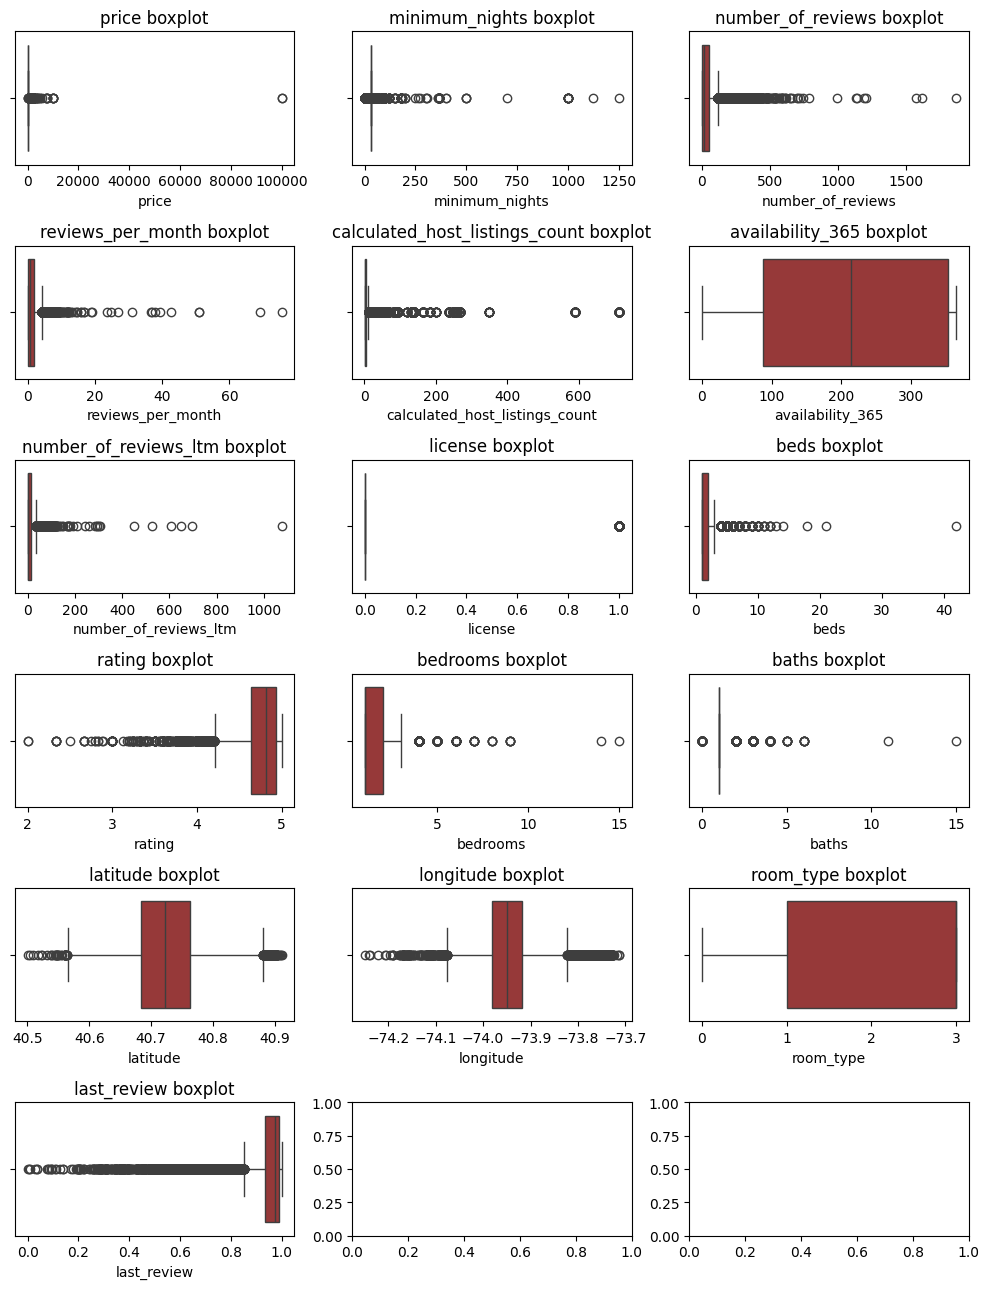

In [15]:
#pokazujemy oprocz zmiennej license, bo to zmienna binarna
fig, axs = plt.subplots(6, 3, figsize = (10, 13))
axs = axs.flatten()

# nasze numeryczne
for i, col in enumerate(numerical):
    sns.boxplot(data = df, x = col, ax=axs[i], color = "brown").set(title = col + " boxplot")

plt.tight_layout()
plt.show()

### 3.3.1. Pyod

(EDIT) Zmieniłem, żeby wyrzucało też tu outliery z last_review, jako, że będą to obserwacje "stare", czyli i tak dobre do wyrzucenia  
(Nie chcemy pokazywać starych apartamentów ludziom, bo może ich tam już nawet nie być)

In [16]:
#usuwamy outliery oprocz dla zmiennyc binarnych (license), zmiennej kategorycznej (room_type), daty (last_review), wspolrzednych (latitude, longitude) oraz ratingu (bo ma duzo Nan)
cols_rest = [cols for cols in df.columns if cols not in ["license", "room_type", "latitude", "longitude", "rating"]]

from pyod.models.knn import KNN
clf = KNN(contamination=0.04)
clf.fit(df[cols_rest])
df['outliers'] = clf.labels_
df['outliers'].value_counts()

outliers
0    15941
1      665
Name: count, dtype: int64

In [17]:
# usuwamy outliery
df = df[df['outliers'] == 0]
df = df.drop('outliers', axis = 1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,3,471.0,30,1,0.898937,0.07,9,365,0,0,NaN,5,8,2
1,40.720270,-73.955130,3,225.0,30,52,0.973081,0.49,5,90,7,0,4.60,2,2,1
2,40.686700,-73.948560,1,80.0,30,101,0.988430,1.00,2,363,12,0,4.93,1,1,1
3,40.732210,-73.986890,3,83.0,30,2,0.965289,0.12,30,106,1,0,NaN,1,1,1
5,40.625140,-74.004700,1,79.0,30,15,0.994569,3.08,4,334,15,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,40.686001,-73.943693,3,135.0,30,15,0.914994,0.97,1,262,1,0,4.87,3,3,1
16602,40.745100,-73.864880,1,68.0,30,16,0.980874,2.68,2,180,16,0,4.69,1,1,1
16603,40.867770,-73.860180,3,100.0,30,30,0.978749,2.21,5,365,24,0,4.73,1,1,1
16604,40.830791,-73.949509,1,50.0,30,19,0.993861,0.21,4,42,1,0,4.84,1,1,1


Sprawdżmy jak teraz wyglądają wykresy

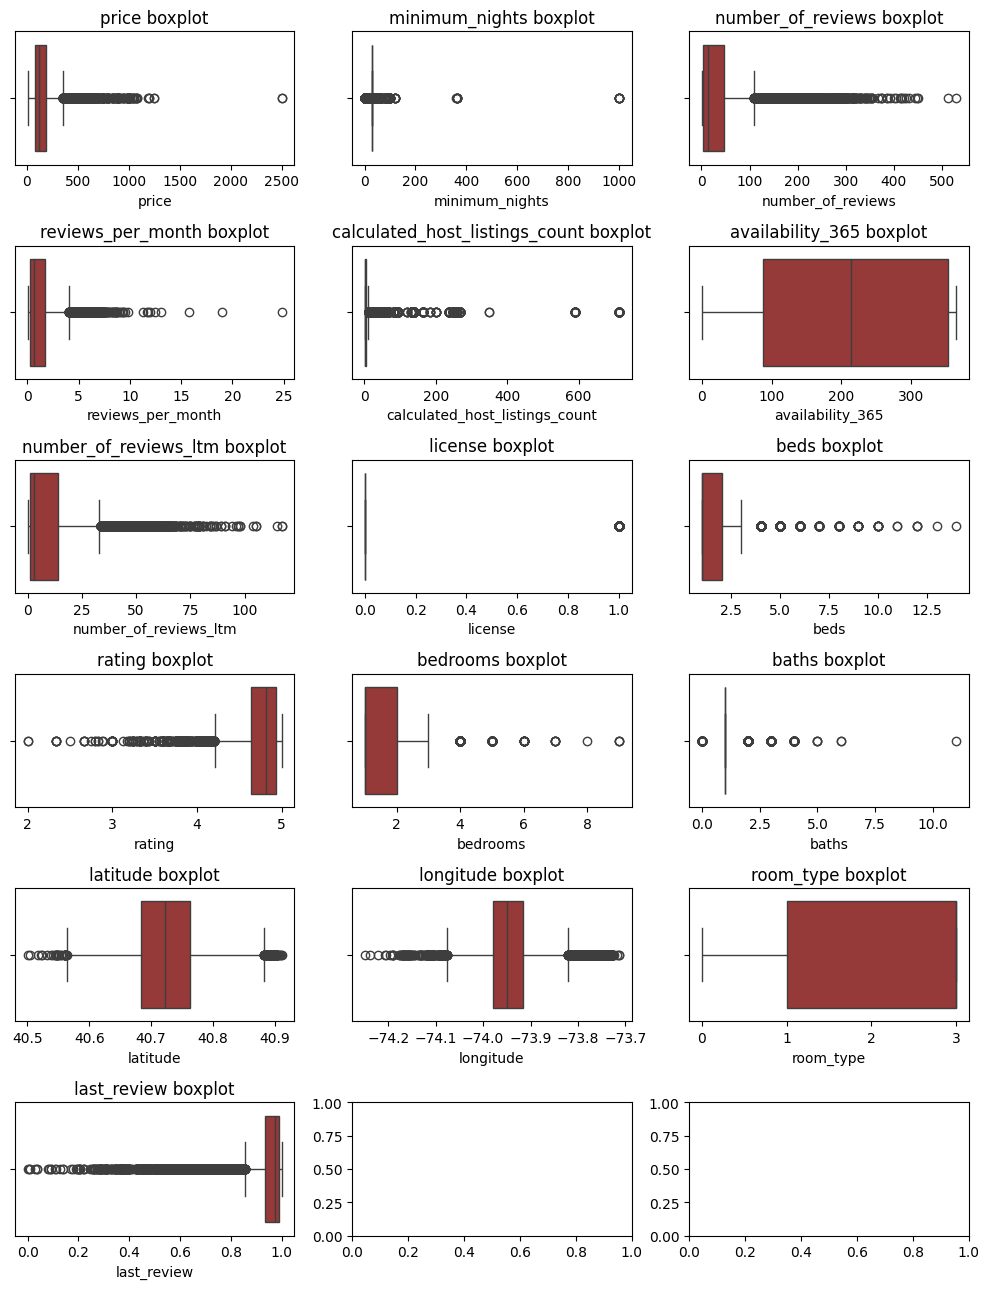

In [18]:
fig, axs = plt.subplots(6, 3, figsize = (10, 13))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data = df, x = col, ax=axs[i], color = "brown").set(title = col + " boxplot")

plt.tight_layout()
plt.show()

## 3.3. Transformacja danych

In [19]:
#bedziemyteraz operowac tylko na niektorych kolumnach - kategorycznych, binarnych (EDIT i ratingu, bo na razie psuje)
rest_cols = [cols for cols in df.columns if cols not in ["license", "room_type", "rating"]]

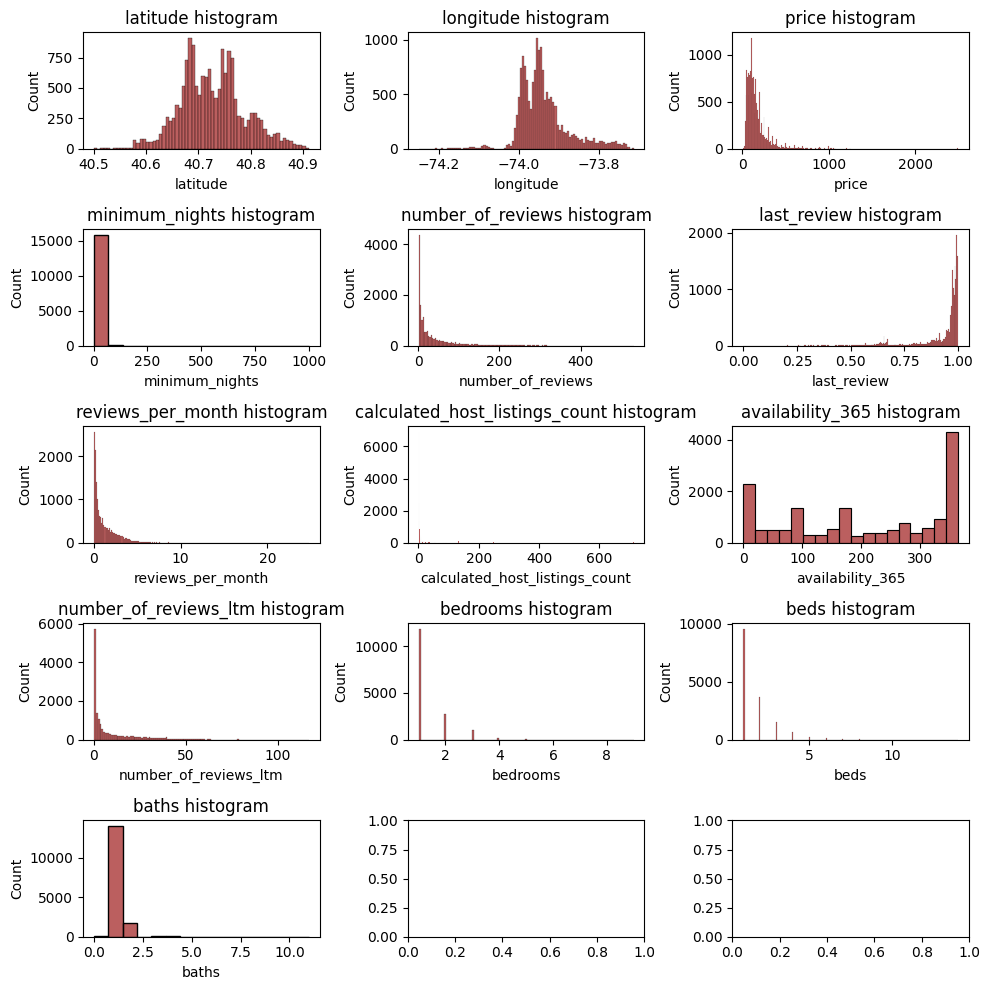

In [20]:
# zobaczmy rozklady zmiennych - histogramy
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

### 3.3.1. Normalizacja
pojawia sie ogolnie pytanie co do normalizacji i standaryzacji wspolrzednych geograficznych, ale chyba nalezy cos z nimi zrobic

#### Transformacja Yeo-Johnson

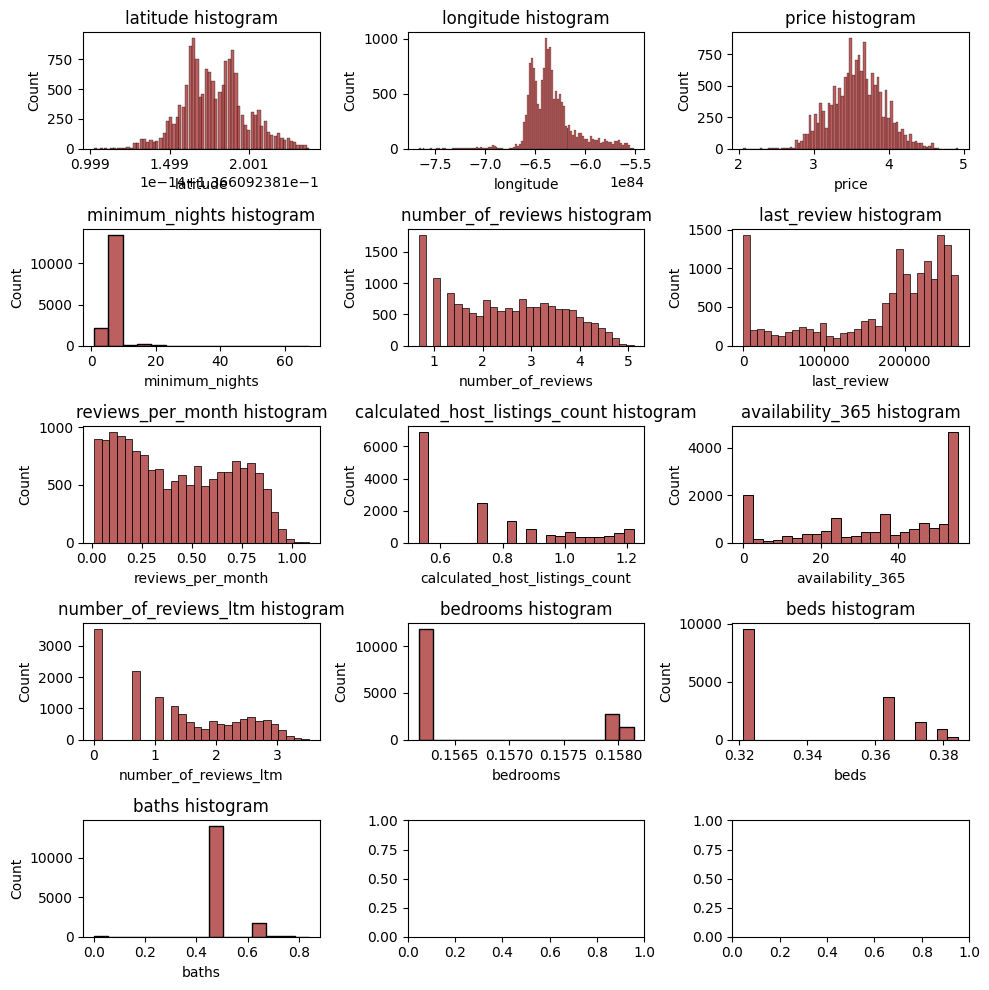

In [21]:
from scipy.stats import yeojohnson
df_yeo = df.copy()
for col in rest_cols:
    df_yeo[col], _ = yeojohnson(df[col])
#histogram
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df_yeo, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

### 3.3.2. Standaryzacja
Bede to wykonywac na danych po transformacji Yeo-Johnsona

#### standard scaler

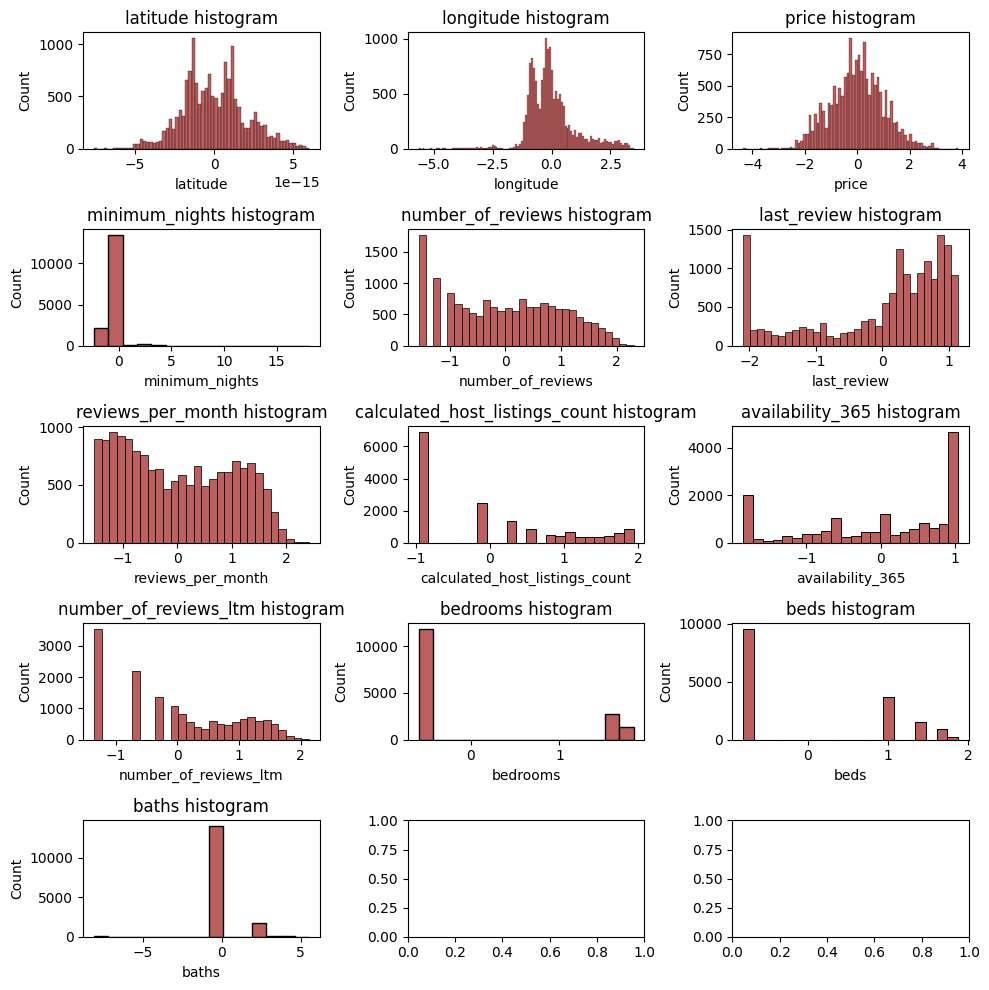

In [22]:
from sklearn.preprocessing import StandardScaler
df_standardScaler = df_yeo.copy()
scaler = StandardScaler()
df_standardScaler[rest_cols] = scaler.fit_transform(df_standardScaler[rest_cols])
df_standardScaler
#histogram
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df_standardScaler, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()

#### minmax scaler

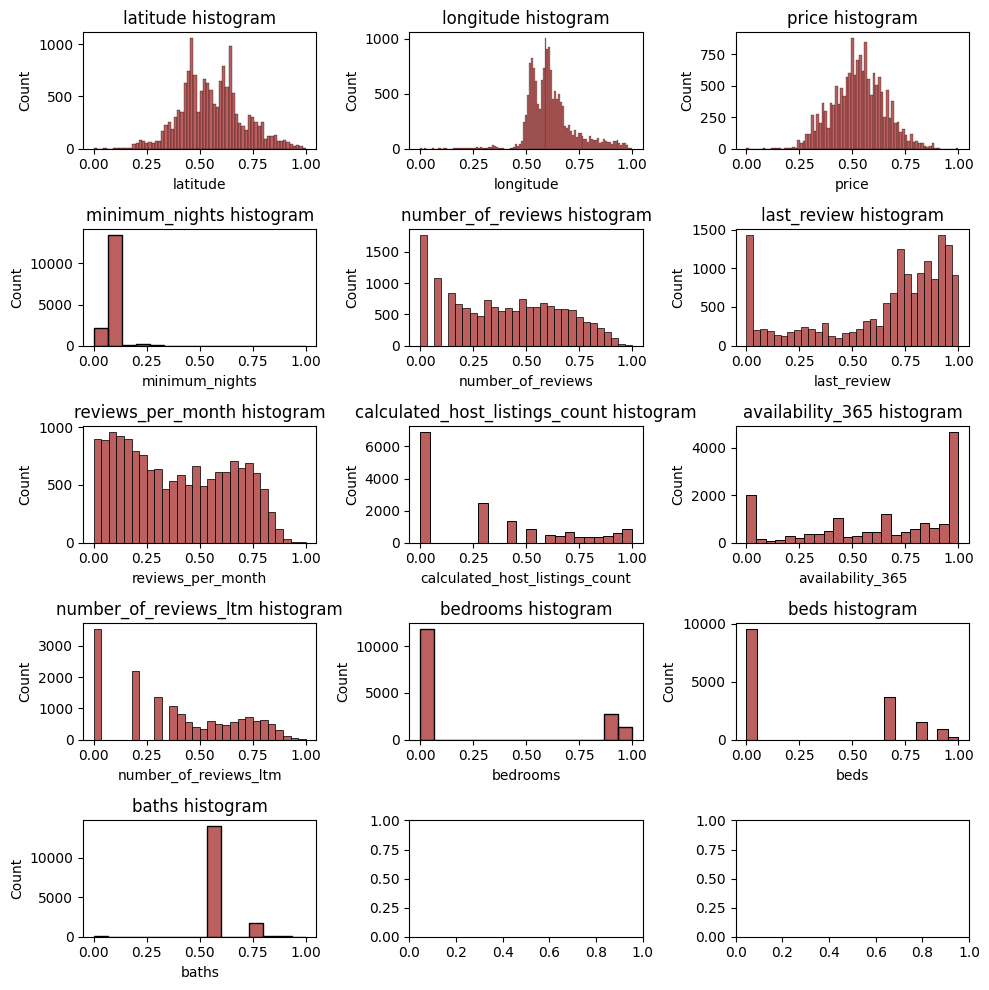

In [23]:
from sklearn.preprocessing import MinMaxScaler
df_minmaxScaler = df_yeo.copy()
scaler = MinMaxScaler()
df_minmaxScaler[rest_cols] = scaler.fit_transform(df_minmaxScaler[rest_cols])
df_minmaxScaler
#histogram

fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df_minmaxScaler, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

### 3.3 Imputacja nanów w ratingu

Postanowiliśmy, że wykorzystamy zwykła regreje liniowa do wypełnienia nanow w ratingu

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# 18% naszego ratingu ma braki
df["rating"].isna().sum() / df.shape[0] * 100

17.916065491499904

In [34]:
df_to_pred = df.copy()

In [35]:
# Te dane będziemy musieli uzupełnic
to_fill = df_to_pred[df_to_pred['rating'].isna()]
to_fill

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.70262,-73.89800,3,471.0,30,1,0.898937,0.07,9,365,0,0,NaN,5,8,2
3,40.73221,-73.98689,3,83.0,30,2,0.965289,0.12,30,106,1,0,NaN,1,1,1
15,40.68421,-73.90789,1,150.0,30,1,0.594097,0.02,1,0,0,0,NaN,1,1,1
18,40.87469,-73.90169,1,200.0,30,1,0.481700,0.01,2,0,0,0,NaN,1,1,1
32,40.67132,-73.96090,1,32.0,30,1,0.783707,0.03,1,322,0,0,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16577,40.74110,-73.98020,3,779.0,30,1,0.567887,0.02,1,90,0,0,NaN,1,2,1
16582,40.75063,-73.99223,3,600.0,30,1,0.740732,0.03,1,0,0,0,NaN,1,1,1
16594,40.68133,-73.91655,3,120.0,30,1,0.992208,0.86,1,179,1,0,NaN,1,1,1
16596,40.68475,-73.91009,1,100.0,3,2,0.993861,1.87,2,73,2,1,NaN,1,1,1


In [36]:
# Na tych danych wyszkolimy nasz LinearRegression model
filled = df[df_to_pred.index.map(lambda x: x not in to_fill.index.to_numpy()).to_numpy()]
filled.shape

(13085, 16)

In [37]:
to_fill = to_fill.reset_index(drop = True)
filled = filled.reset_index(drop = True)
to_fill

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.70262,-73.89800,3,471.0,30,1,0.898937,0.07,9,365,0,0,NaN,5,8,2
1,40.73221,-73.98689,3,83.0,30,2,0.965289,0.12,30,106,1,0,NaN,1,1,1
2,40.68421,-73.90789,1,150.0,30,1,0.594097,0.02,1,0,0,0,NaN,1,1,1
3,40.87469,-73.90169,1,200.0,30,1,0.481700,0.01,2,0,0,0,NaN,1,1,1
4,40.67132,-73.96090,1,32.0,30,1,0.783707,0.03,1,322,0,0,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,40.74110,-73.98020,3,779.0,30,1,0.567887,0.02,1,90,0,0,NaN,1,2,1
2852,40.75063,-73.99223,3,600.0,30,1,0.740732,0.03,1,0,0,0,NaN,1,1,1
2853,40.68133,-73.91655,3,120.0,30,1,0.992208,0.86,1,179,1,0,NaN,1,1,1
2854,40.68475,-73.91009,1,100.0,3,2,0.993861,1.87,2,73,2,1,NaN,1,1,1


In [38]:
# Szkolimy model regresji liniowej
X = filled.drop("rating", axis = 1)
y = filled["rating"]
lr = LinearRegression()
lr.fit(X, y)
new_rating = lr.predict(to_fill.drop("rating", axis = 1))
pd.Series(new_rating)

0       4.661572
1       4.715940
2       4.687182
3       4.623642
4       4.655185
          ...   
2851    4.822479
2852    4.841329
2853    4.771499
2854    4.810873
2855    4.717473
Length: 2856, dtype: float64

In [39]:
# Wypełniamy nany
to_fill["rating"] = new_rating
to_fill['rating']

0       4.661572
1       4.715940
2       4.687182
3       4.623642
4       4.655185
          ...   
2851    4.822479
2852    4.841329
2853    4.771499
2854    4.810873
2855    4.717473
Name: rating, Length: 2856, dtype: float64

In [42]:
# Czy wszystko dobrze poszło? tak
to_fill['rating'].isna().sum()

0

In [43]:
# Sprawdźmy czy na pewno żadnych danych przypadkowo nie utraciliśmy
print(to_fill.shape[0] + filled.shape[0])
print(df.shape[0])

15941
15941


In [51]:
# Pozostaje zatem przepisac ramke jako nowa df
df = pd.concat([to_fill, filled], axis = 0).reset_index(drop = True)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,3,471.0,30,1,0.898937,0.07,9,365,0,0,4.661572,5,8,2
1,40.732210,-73.986890,3,83.0,30,2,0.965289,0.12,30,106,1,0,4.715940,1,1,1
2,40.684210,-73.907890,1,150.0,30,1,0.594097,0.02,1,0,0,0,4.687182,1,1,1
3,40.874690,-73.901690,1,200.0,30,1,0.481700,0.01,2,0,0,0,4.623642,1,1,1
4,40.671320,-73.960900,1,32.0,30,1,0.783707,0.03,1,322,0,0,4.655185,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15936,40.745330,-73.919580,1,55.0,30,3,0.983943,0.21,1,364,2,0,5.000000,2,1,1
15937,40.686001,-73.943693,3,135.0,30,15,0.914994,0.97,1,262,1,0,4.870000,3,3,1
15938,40.745100,-73.864880,1,68.0,30,16,0.980874,2.68,2,180,16,0,4.690000,1,1,1
15939,40.867770,-73.860180,3,100.0,30,30,0.978749,2.21,5,365,24,0,4.730000,1,1,1


### 3.4 Ostateczne transformacje

(Propozycja Bartek):
- wyrzucamy number_of_reviews_ltm i zostawiamy revies_pre_month (silna korelacja między nimi i znaczą prawie to samo)
- z tego samego powodu wyrzucamy bedrooms zostawiając beds
- po imputacji ratingu wszystkie kolumny oprócz: latitude, longitude, room_type, license wrzucamy do yeo-johnsona (który unormuje zmienne)
- na koniec korzystamy z MinMaxScalera na wszystkich zmiennych, aby klastering mógł dobrze działać

REALIZACJA:

In [55]:
# Wyrzucanie skolerowanych kolumn
df = df.drop(["number_of_reviews_ltm", "bedrooms"], axis = 1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,license,rating,beds,baths
0,40.702620,-73.898000,3,471.0,30,1,0.898937,0.07,9,365,0,4.661572,8,2
1,40.732210,-73.986890,3,83.0,30,2,0.965289,0.12,30,106,0,4.715940,1,1
2,40.684210,-73.907890,1,150.0,30,1,0.594097,0.02,1,0,0,4.687182,1,1
3,40.874690,-73.901690,1,200.0,30,1,0.481700,0.01,2,0,0,4.623642,1,1
4,40.671320,-73.960900,1,32.0,30,1,0.783707,0.03,1,322,0,4.655185,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15936,40.745330,-73.919580,1,55.0,30,3,0.983943,0.21,1,364,0,5.000000,1,1
15937,40.686001,-73.943693,3,135.0,30,15,0.914994,0.97,1,262,0,4.870000,3,1
15938,40.745100,-73.864880,1,68.0,30,16,0.980874,2.68,2,180,0,4.690000,1,1
15939,40.867770,-73.860180,3,100.0,30,30,0.978749,2.21,5,365,0,4.730000,1,1


In [57]:
from scipy.stats import yeojohnson
# korzystanie z yeo_johhsona
rest_cols = [cols for cols in df.columns if cols not in ["longitude", "latitude", "room_type", "license"]]
df_yeo = df.copy()
for col in rest_cols:
    df_yeo[col], _ = yeojohnson(df[col])
df_yeo

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,license,rating,beds,baths
0,40.702620,-73.898000,3,4.250810,9.520575,0.677165,82927.342301,0.065716,1.039656,55.545541,0,1.898219e+08,0.383432,0.632942
1,40.732210,-73.986890,3,3.376187,9.520575,1.058824,179703.530321,0.107948,1.153006,25.730345,0,2.138056e+08,0.321225,0.482554
2,40.684210,-73.907890,1,3.695391,9.520575,0.677165,1612.462518,0.019634,0.529664,0.000000,0,2.007927e+08,0.321225,0.482554
3,40.874690,-73.901690,1,3.842537,9.520575,0.677165,310.762173,0.009908,0.726032,0.000000,0,1.745835e+08,0.321225,0.482554
4,40.671320,-73.960900,1,2.815121,9.520575,0.677165,20254.756540,0.029184,0.529664,51.420661,0,1.871732e+08,0.321225,0.482554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15936,40.745330,-73.919580,1,3.140968,9.520575,1.323343,222299.626586,0.175726,0.529664,55.451899,0,3.910609e+08,0.321225,0.482554
15937,40.686001,-73.943693,3,3.640198,9.520575,2.528349,100239.155920,0.512901,0.529664,45.274769,0,2.977234e+08,0.374230,0.482554
15938,40.745100,-73.864880,1,3.263605,9.520575,2.578513,214682.416928,0.781293,0.726032,35.864771,0,2.020351e+08,0.321225,0.482554
15939,40.867770,-73.860180,3,3.479111,9.520575,3.064673,209555.769643,0.734329,0.942525,55.545541,0,2.204457e+08,0.321225,0.482554


In [59]:
# Na koniec wrzucamy do minmaxscalera WSZYSTKIE kolumny
df_final = df_yeo.copy()
scaler = MinMaxScaler()
df_final[df_final.columns] = scaler.fit_transform(df_final[df_final.columns])
df_final

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,license,rating,beds,baths
0,0.492428,0.656185,1.000000,0.763182,0.130256,0.000000,0.311124,0.051859,0.736508,1.000000,0.0,0.469925,0.985188,0.753758
1,0.564453,0.490405,1.000000,0.458095,0.130256,0.086018,0.674205,0.091103,0.900202,0.463230,0.0,0.529321,0.000000,0.574664
2,0.447617,0.637740,0.333333,0.569440,0.130256,0.000000,0.006050,0.009038,0.000000,0.000000,0.0,0.497095,0.000000,0.574664
3,0.911261,0.649303,0.333333,0.620767,0.130256,0.000000,0.001166,0.000000,0.283586,0.000000,0.0,0.432187,0.000000,0.574664
4,0.416242,0.538876,0.333333,0.262383,0.130256,0.000000,0.075991,0.017912,0.000000,0.925739,0.0,0.463366,0.000000,0.574664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15936,0.596388,0.615938,0.333333,0.376045,0.130256,0.145635,0.834016,0.154086,0.000000,0.998314,0.0,0.968298,0.000000,0.574664
15937,0.451976,0.570967,1.000000,0.550187,0.130256,0.417217,0.376074,0.467403,0.000000,0.815093,0.0,0.737146,0.839453,0.574664
15938,0.595828,0.717954,0.333333,0.418824,0.130256,0.428523,0.805438,0.716806,0.283586,0.645682,0.0,0.500171,0.000000,0.574664
15939,0.894417,0.726720,1.000000,0.493997,0.130256,0.538093,0.786204,0.673164,0.596236,1.000000,0.0,0.545766,0.000000,0.574664


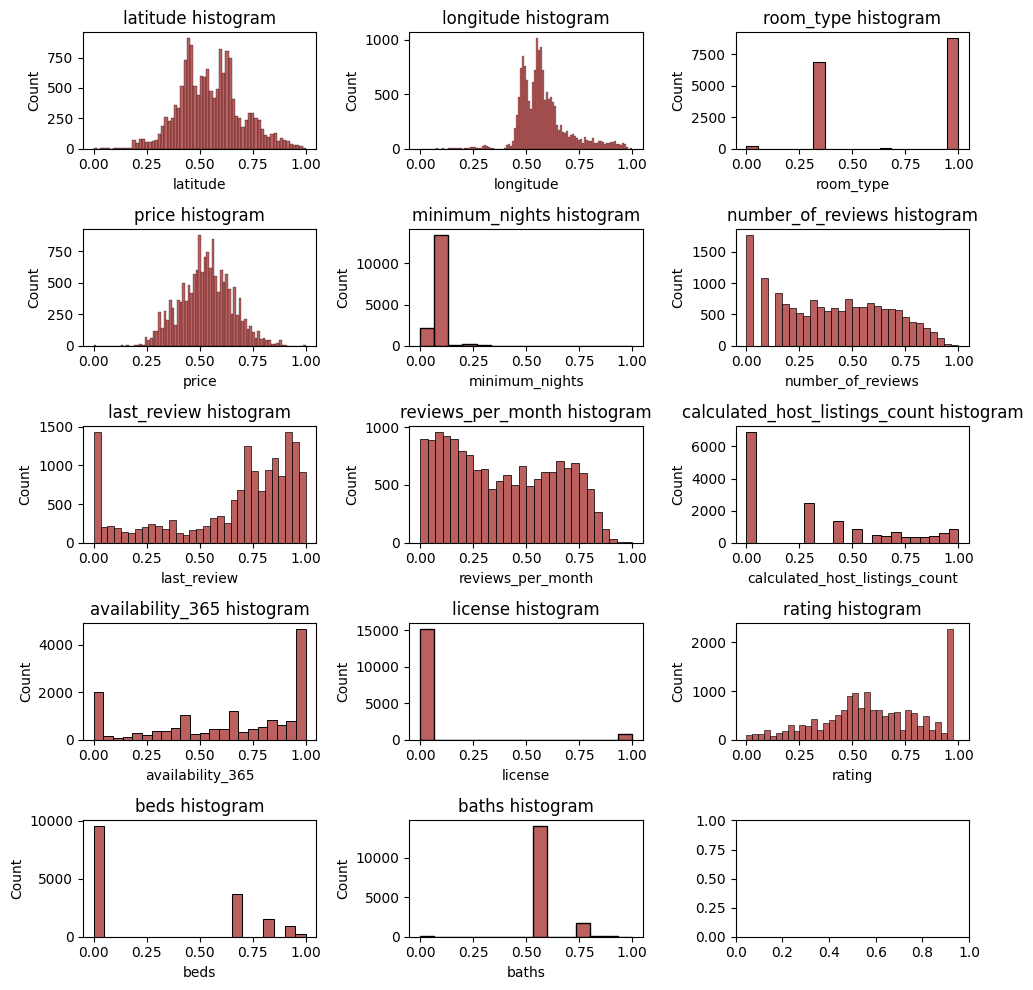

In [61]:
# Zostaje zobaczyć efekt na wykresach
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(df_final.columns):
    sns.histplot(data = df_final, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

# 4. Wstępne modele

Na razie przeprowadzam na df_final

## 4.1 K-Means

In [76]:
seed = 17

### 4.1.1 Elbow method

In [65]:
from sklearn.cluster import KMeans

In [77]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=seed)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

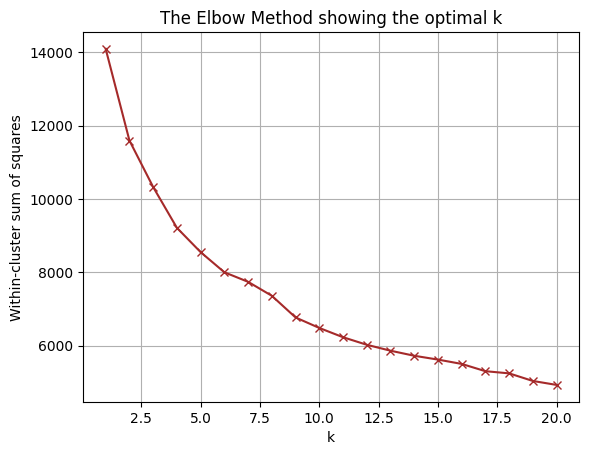

In [83]:
wcss_vec = count_wcss_scores(df_final, 20)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'x-', color = "brown")
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

Tu ciężko określić albo 6 albo 9 jest optymalne

### 4.1.2 Silhouette score

In [69]:
from sklearn.metrics import silhouette_score

In [79]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k, random_state = seed)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

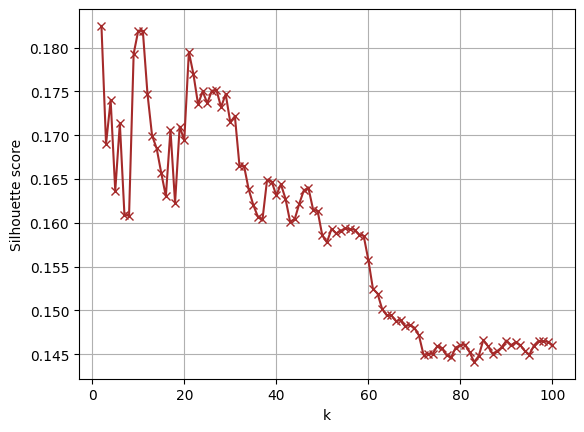

In [96]:
# Bardzo długo się robi!!!
cluster_num_seq = range(2, 101)
silhouette_vec = count_clustering_scores(df_final, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'x-', color = "brown")
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

Tu ewidentnie 10 lub 11 klastrów albo jeśli chcielibyśmy więcej to 21

### 4.1.3 Calinski Harabash score

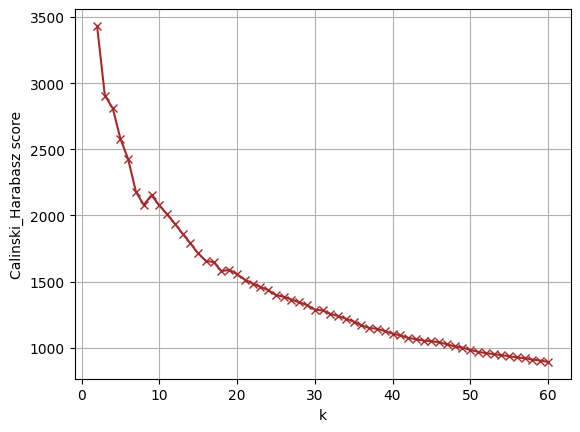

In [91]:
from sklearn.metrics import calinski_harabasz_score

cluster_num_seq = range(2, 61)
silhouette_vec = count_clustering_scores(df_final, cluster_num_seq, KMeans, calinski_harabasz_score)
plt.plot(cluster_num_seq, silhouette_vec, 'x-', color = "brown")
plt.xlabel('k')
plt.ylabel('Calinski_Harabasz score')
plt.grid()
plt.show()

### 4.1.4 Davies Bouldin score

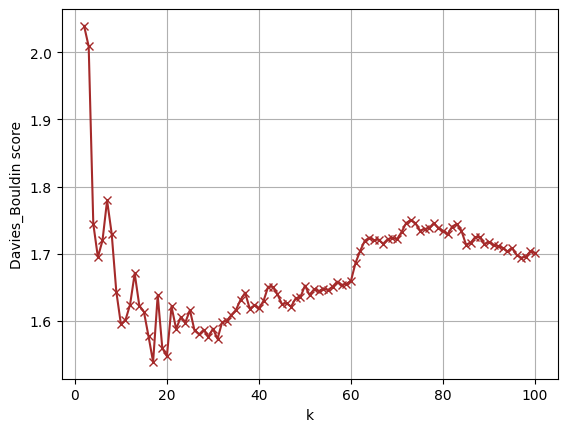

In [95]:
from sklearn.metrics import davies_bouldin_score
cluster_num_seq = range(2, 101)
silhouette_vec = count_clustering_scores(df_final, cluster_num_seq, KMeans, davies_bouldin_score)
plt.plot(cluster_num_seq, silhouette_vec, 'x-', color = "brown")
plt.xlabel('k')
plt.ylabel('Davies_Bouldin score')
plt.grid()
plt.show()